Massiel Sanchez
Project 3

Topics: Machine Learning Technique

Resources Used:
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/model_evaluation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
- ChatGPT for errors

__________________________________________________________________________
### Questions 1 and 2: Import, Clean and Spilt the Dataset            
_________________________________________________________________________

In [1]:
# Questions 1 and 2

import pandas as pd
from sklearn.model_selection import train_test_split

#Reading in the data
data_df = pd.read_csv('breast-cancer.csv')
num_rows, num_columns = data_df.shape
print("rows: ", num_rows, "cols: ", num_columns)


#Data Cleaning: 

#Remove all Rows with Empty Cells
clean_data = data_df.dropna()


#Remove all Rows with Cells with Zeros
clean_no_Zero = data_df[(data_df != 0).all(axis=1)]
num_rows3, num_columns3 = clean_no_Zero.shape
print("rows: ", num_rows3, "cols: ", num_columns3)

# Split-Data: 
# Training Set contains 80% of data, Testing 20%

features = data_df.drop(['id', 'diagnosis'], axis=1) #isolates the features
target = data_df['diagnosis'] #extracts the diagnosis column 

train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, train_size=0.8, random_state=9)




rows:  569 cols:  32
rows:  556 cols:  32


### Question 3: Train the Dataset on the Decision Tree Classifier

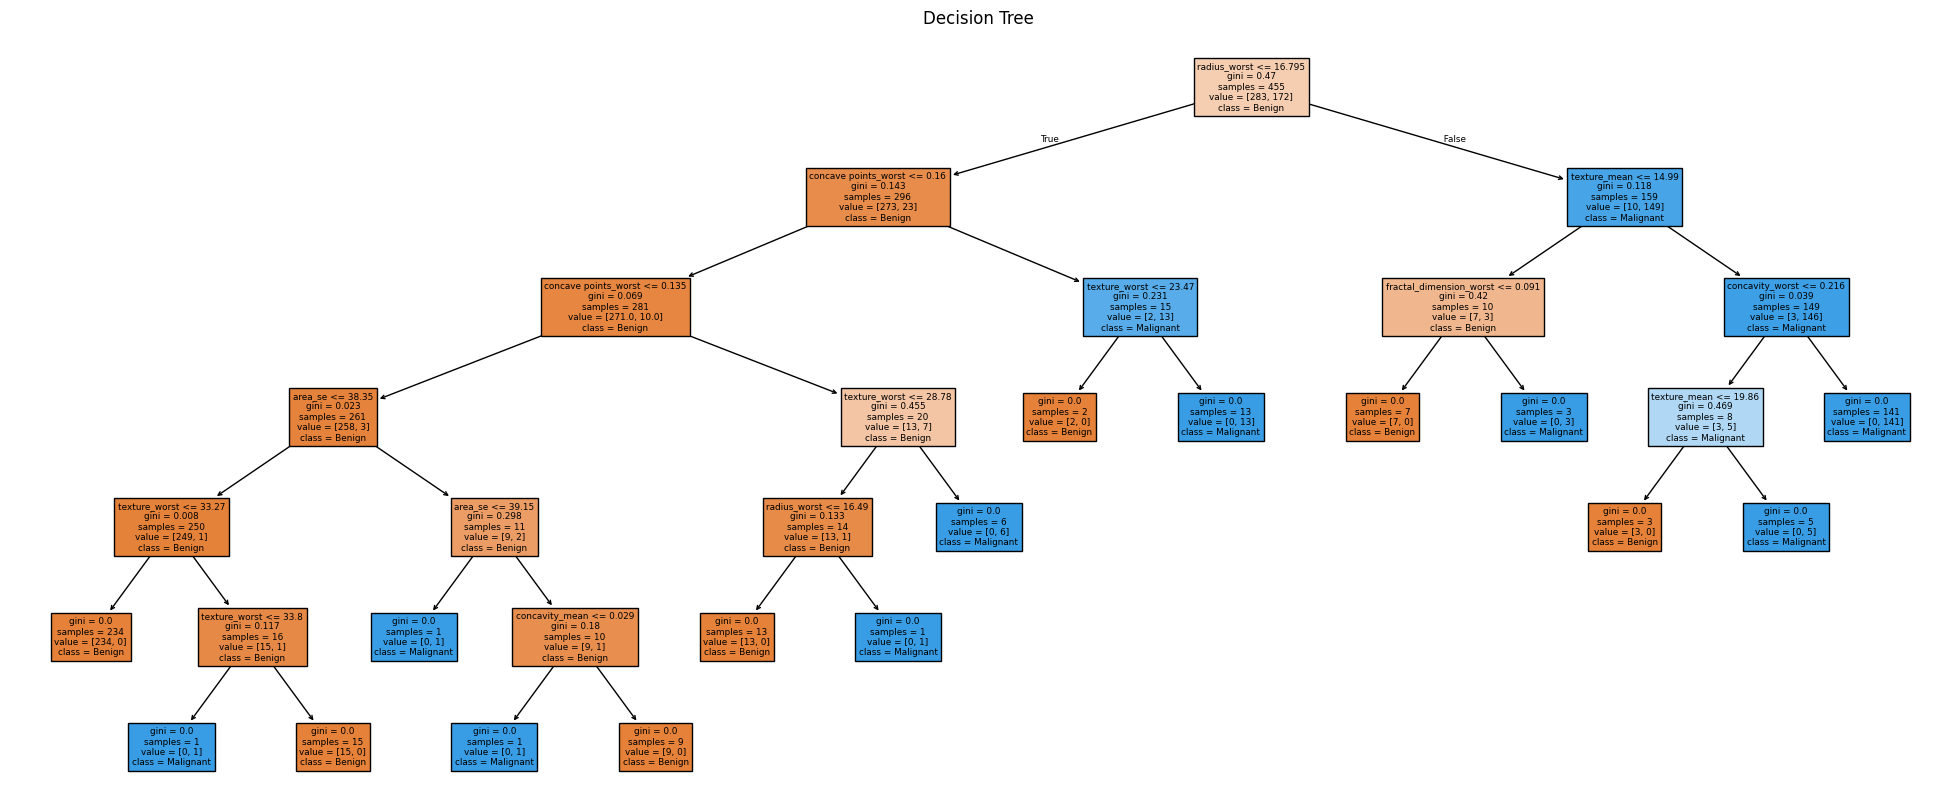

In [2]:
# Modeling with the Decision Tree Classifier 

from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import time

clf = tree.DecisionTreeClassifier()

start_time = time.time()
clf = clf.fit(train_features, train_target)
end_time = time.time()

Total_Training_Time = end_time - start_time

# Plot the Decision Tree
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True, feature_names=features.columns, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree")
plt.show()




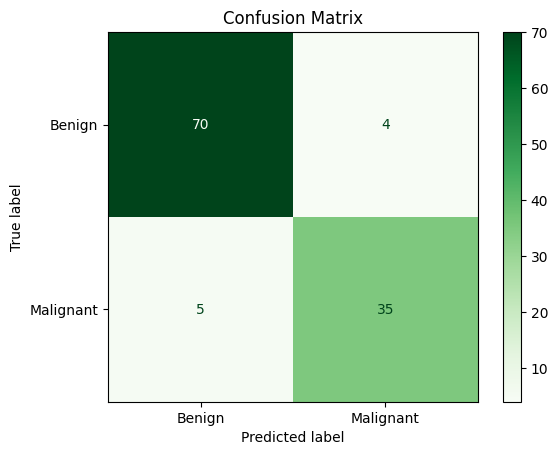

TRAINING WITH DECISION TREE CLASSIFIER
Training Time: 0.025168657302856445
Accuracy: 0.9210526315789473
Sensitivity: 0.875
Specificity: 0.9459459459459459


In [3]:
#Evaluation of Tree based on Testing Data
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


y_pred = clf.predict(test_features)

# Calculate performance metrics
accuracy = accuracy_score(test_target, y_pred)
sensitivity = recall_score(test_target, y_pred, pos_label='M')  


cm = confusion_matrix(test_target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

TN = cm[0][0]
FP = cm[0][1]
specificity = TN / (TN + FP)


# Display metrics
print("TRAINING WITH DECISION TREE CLASSIFIER")
print("Training Time:", Total_Training_Time)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)



### Question 4: Train the Dataset on the Support Vector Machine (RBF) Classifier

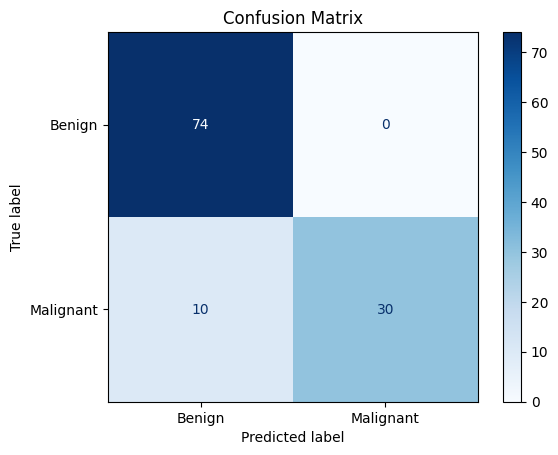

TRAINING WITH VECTOR MACHINE CLASSIFIER
Training Time: 0.021814823150634766
Accuracy: 0.9122807017543859
Sensitivity: 0.75
Specificity: 1.0


In [4]:
from sklearn.svm import SVC

features = data_df.drop(['id', 'diagnosis'], axis=1)
target = data_df['diagnosis']
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, train_size=0.8, random_state=9)

svm_model = SVC(kernel='rbf', C=1.0)  

start_time2 = time.time()
svm_model.fit(train_features, train_target)
end_time2 = time.time()

Total_Training_Time2 = end_time2 - start_time2

y_pred2 = svm_model.predict(test_features)

# Metrics
accuracy2 = accuracy_score(test_target, y_pred2)
sensitivity2 = recall_score(test_target, y_pred2, pos_label='M') 

# Confusion matrix for specificity
cm_ = confusion_matrix(test_target, y_pred2)
TN2 = cm_[0][0] #Top Left true negatives
FP2 = cm_[0][1] #Top Right False Positives
specificity2 = TN2 / (TN2 + FP2)

# (bottom-right) - True Positives
# (bottom-left) - False Negatives

disp = ConfusionMatrixDisplay(confusion_matrix=cm_, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Display metrics
print("TRAINING WITH VECTOR MACHINE CLASSIFIER")
print("Training Time:", Total_Training_Time2)
print("Accuracy:", accuracy2)
print("Sensitivity:", sensitivity2)
print("Specificity:", specificity2)

### Question 6

#####  Find the feature importance using Random Forest Method. Visualize the top two columns (feature) in x-y coordinate system

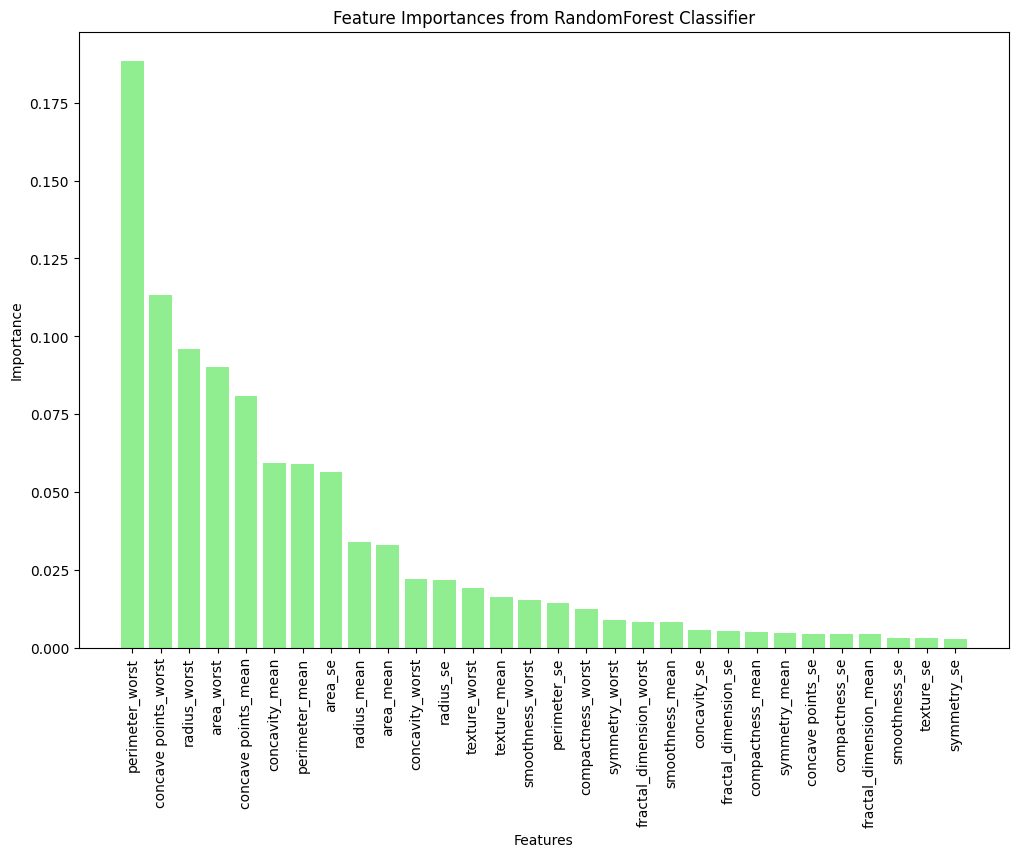

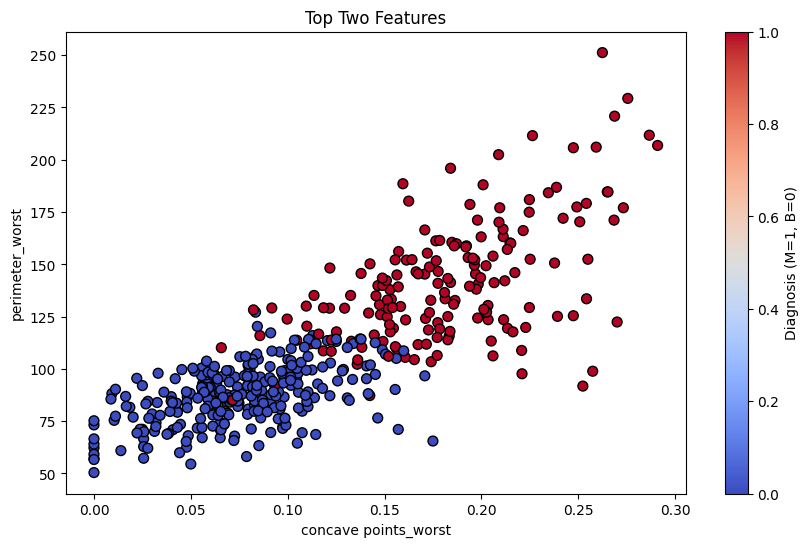

In [5]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Train Random Forest
forest = RandomForestClassifier(random_state=0)
forest.fit(train_features, train_target)

# Get feature importances
importances = forest.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({'Features': train_features.columns, 'Importance': importances})
features_df_sorted = features_df.sort_values('Importance', ascending=False)

# Plotting the Feature Importances
plt.figure(figsize=(12, 8))
plt.bar(features_df_sorted['Features'], features_df_sorted['Importance'], color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForest Classifier')
plt.xticks(rotation=90)  # Rotate feature names on x-coordinates 
plt.show()

# Identify the top two features
top_two_indices = np.argsort(importances)[-2:]
top_two_features = train_features.columns[top_two_indices]

#  map target to numerical values 0 and 1 for coloring
target_mapping = {'M': 1, 'B': 0}
mapped_train_target = train_target.map(target_mapping)

# Plotting the top two features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_features.iloc[:, top_two_indices[0]], train_features.iloc[:, top_two_indices[1]], c=mapped_train_target, cmap='coolwarm', edgecolor='k', s=50)
plt.colorbar(scatter, label='Diagnosis (M=1, B=0)')
plt.xlabel(train_features.columns[top_two_indices[0]])
plt.ylabel(train_features.columns[top_two_indices[1]])
plt.title('Top Two Features')
plt.show()


##### Remove the feature with the lowest importance and retrain your model using Decision Tree. Draw Decision and Evaluate performance of the model. Track the training time.

symmetry_se


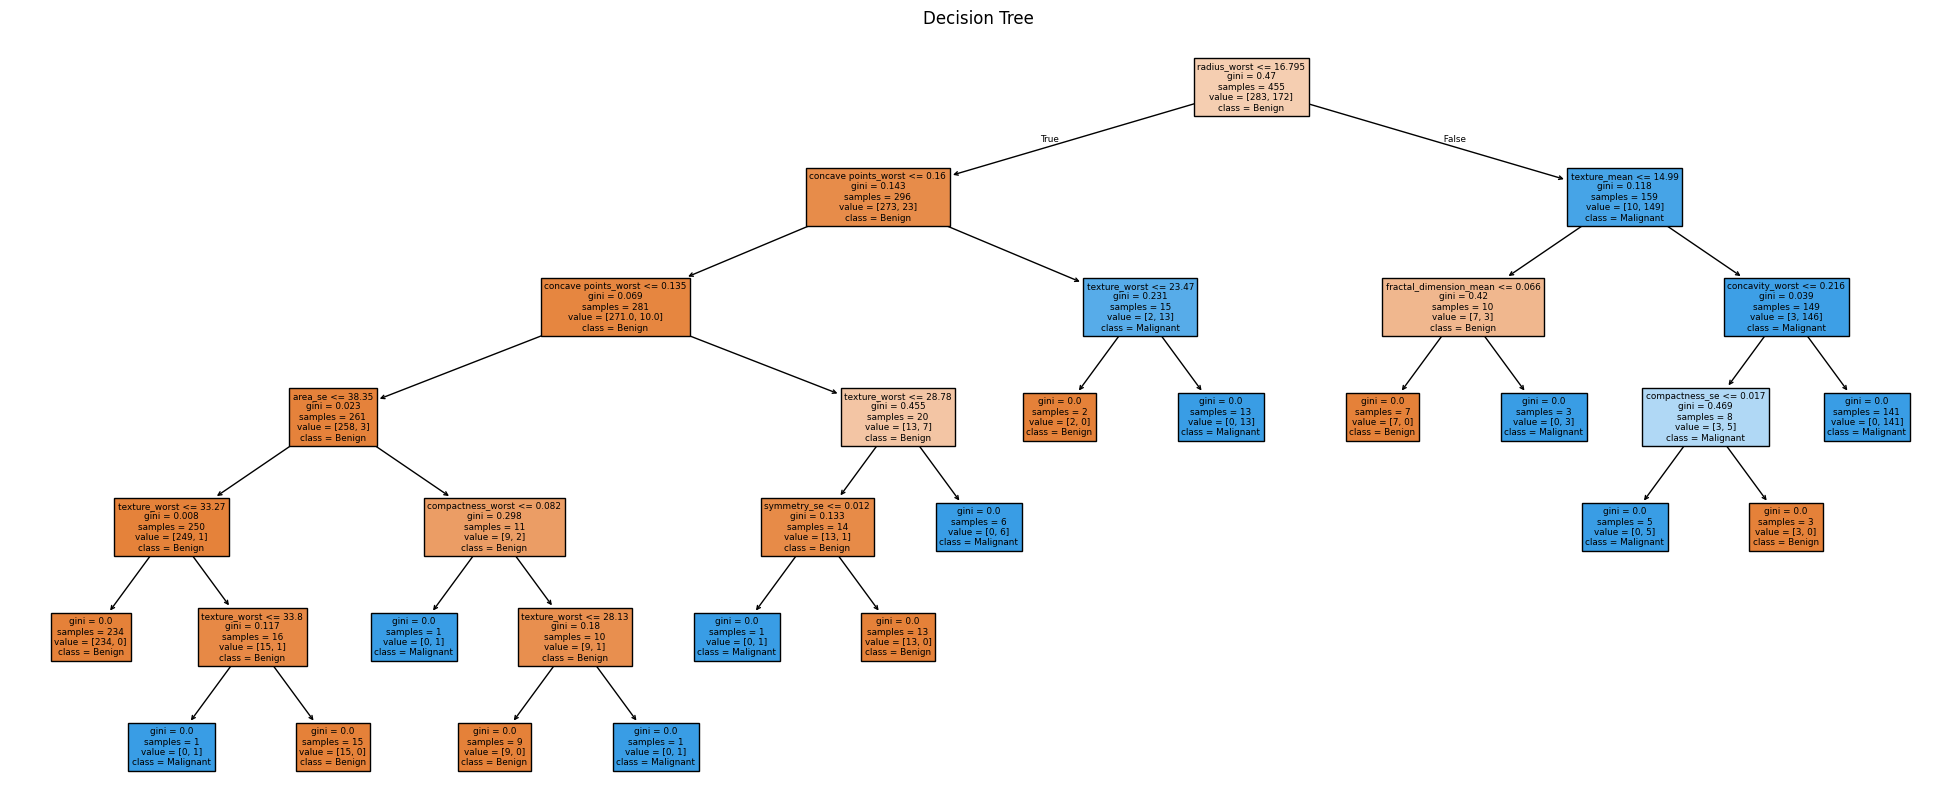

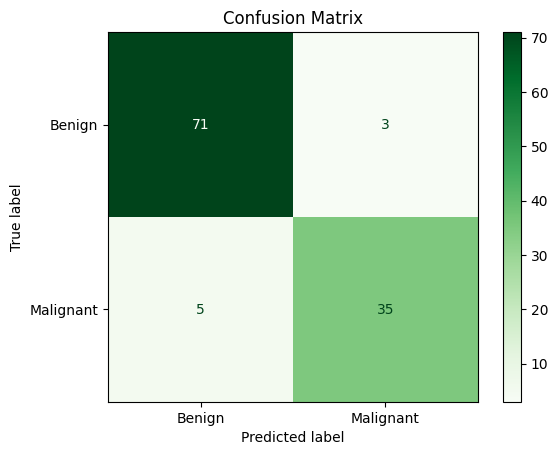

Training Time: 0.024152278900146484
Accuracy: 0.9298245614035088
Sensitivity: 0.875
Specificity: 0.9594594594594594


In [6]:

# Find and Remove the Lowest importance feature
lowest_feature = np.argmin(importances)
print(features.columns[lowest_feature])

features_dropped = features.drop(features.columns[lowest_feature], axis=1)

# Retrain with Decision Tree
train_features_dropped, test_features_dropped, train_target, test_target = train_test_split(features_dropped, target, test_size=0.2, train_size=0.8, random_state=9)

retrain_clf = tree.DecisionTreeClassifier()

start_time3 = time.time()
retrain_clf = retrain_clf.fit(train_features, train_target)
end_time3 = time.time()

total_time3 = end_time3 - start_time3

# Plot the Decision Tree
plt.figure(figsize=(25, 10))
plot_tree(retrain_clf, filled=True, feature_names=features.columns, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree")
plt.show()


y_pred3 = retrain_clf.predict(test_features)

# Calculate performance metrics
accuracy3 = accuracy_score(test_target, y_pred3)
sensitivity3 = recall_score(test_target, y_pred3, pos_label='M')  


cm3 = confusion_matrix(test_target, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

TN3 = cm3[0][0]
FP3 = cm3[0][1]
specificity3 = TN3 / (TN3 + FP3)


# Display metrics
print("Training Time:", total_time3)
print("Accuracy:", accuracy3)
print("Sensitivity:", sensitivity3)
print("Specificity:", specificity3)



##### Remove the four features with the lowest importances and retrain your model using Decision Tree. Draw Decision tree and Evaluate performance of the model. Track the training time.

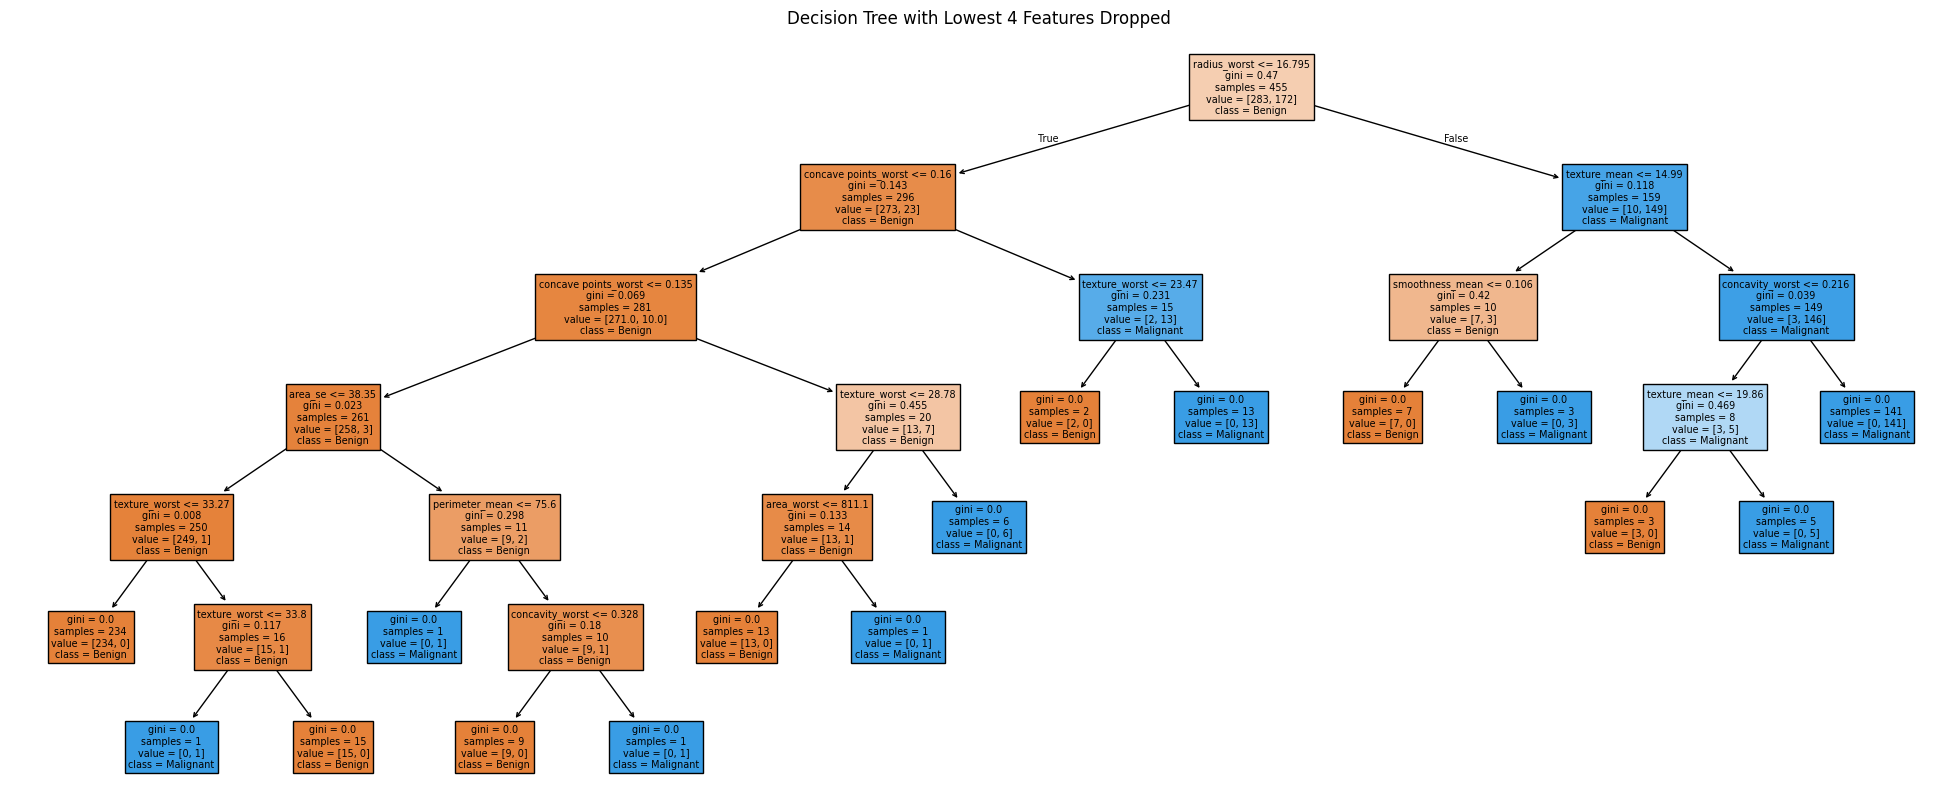

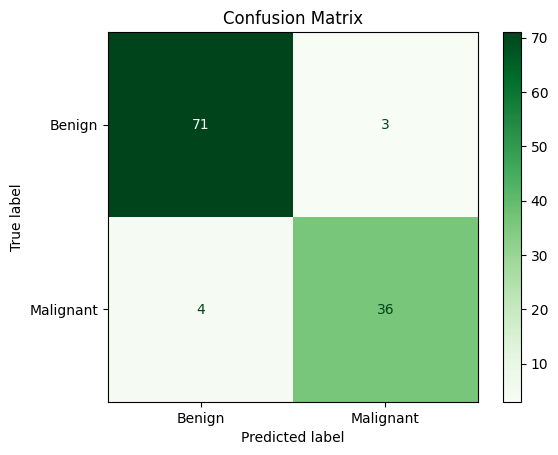

Training Time: 0.012881278991699219
Accuracy: 0.9385964912280702
Sensitivity: 0.9
Specificity: 0.9594594594594594


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Assuming all required libraries and data have been correctly loaded and preprocessed

# Find and Remove the Lowest Importance Features
lowest_features = np.argsort(importances)[:4]
features_dropped = features.drop(features.columns[lowest_features], axis=1)

# Retrain with Decision Tree
train_features_dropped, test_features_dropped, train_target, test_target = train_test_split(
    features_dropped, target, test_size=0.2, train_size=0.8, random_state=9)

decision_tree = DecisionTreeClassifier()
start_time = time.time()
decision_tree.fit(train_features_dropped, train_target)
end_time = time.time()

total_time = end_time - start_time

# Plot the Decision Tree
plt.figure(figsize=(25, 10))
plot_tree(decision_tree, filled=True, feature_names=features_dropped.columns, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree with Lowest 4 Features Dropped")
plt.show()

# Predict and Evaluate Performance
y_pred = decision_tree.predict(test_features_dropped)

accuracy = accuracy_score(test_target, y_pred)
sensitivity = recall_score(test_target, y_pred, pos_label='M')

cm = confusion_matrix(test_target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

TN = cm[0][0]
FP = cm[0][1]
specificity = TN / (TN + FP)

# Display metrics
print("Training Time:", total_time)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


##### Remove the ten features with the lowest importances and retrain your model using Decision Tree. Draw Decision tree and Evaluate performance of the model. Track the training time.

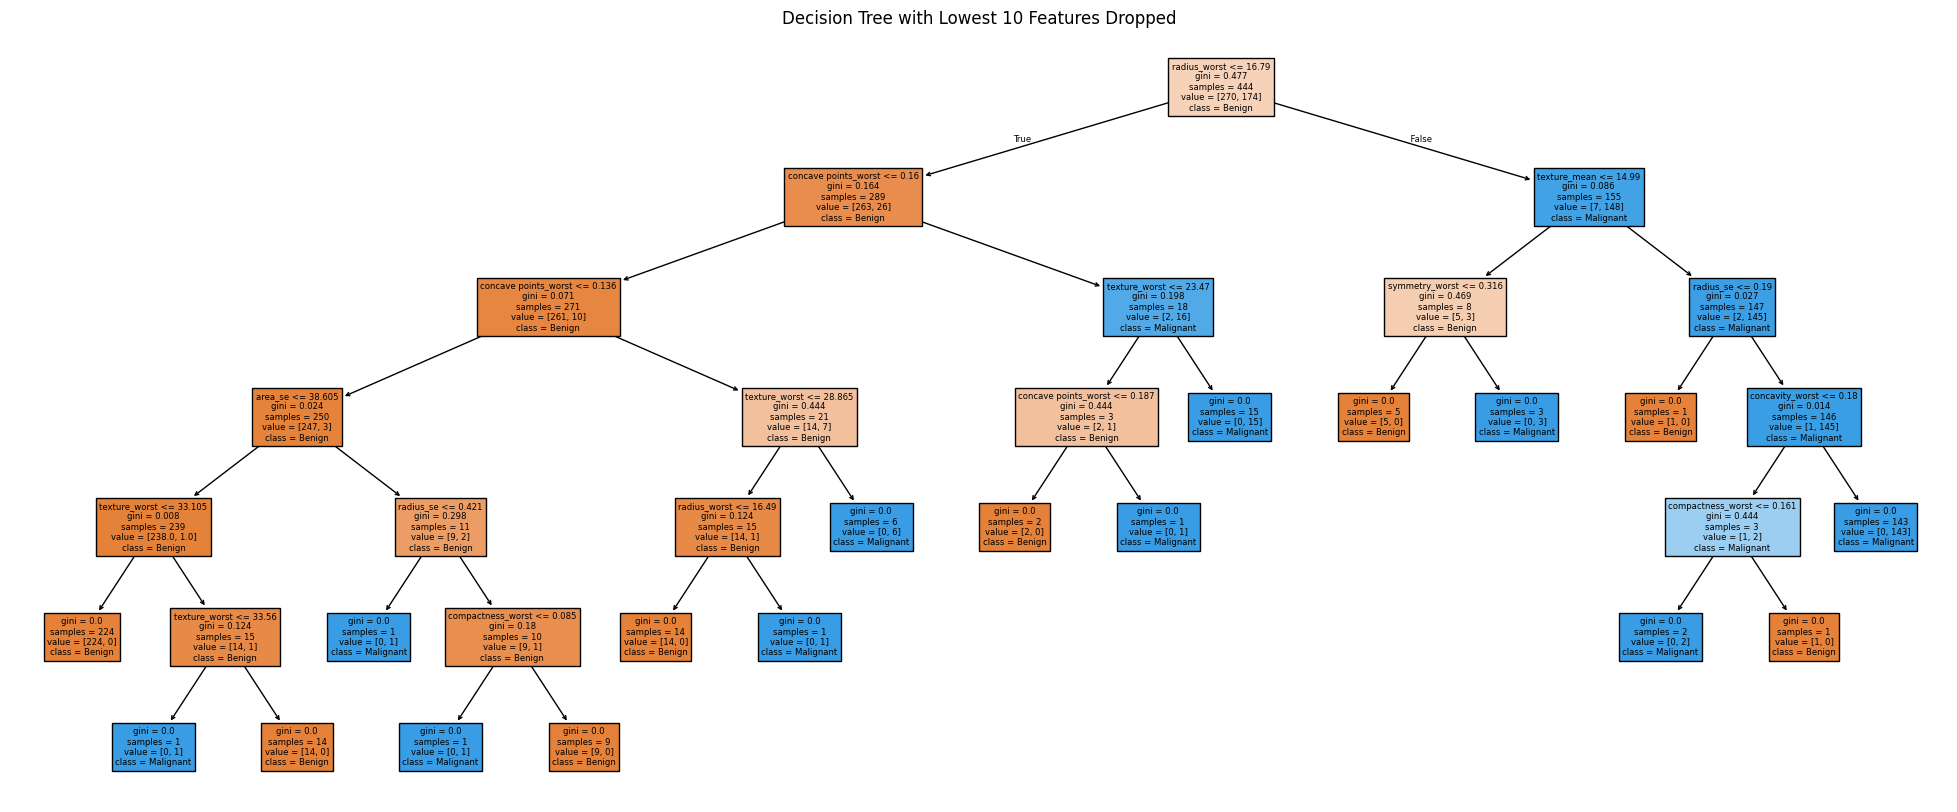

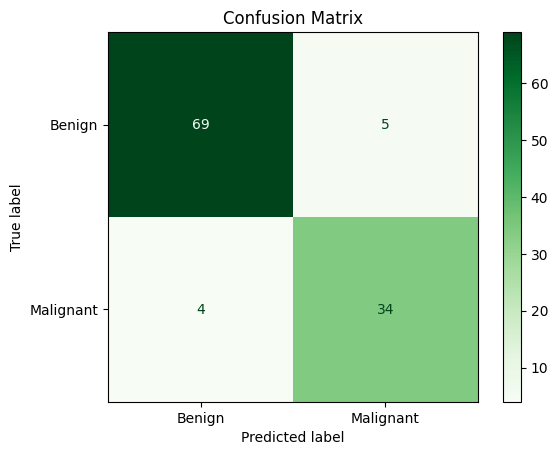

REMOVING 10 LOWEST FEATURES: 
Training Time: 0.010065555572509766
Accuracy: 0.9196428571428571
Sensitivity: 0.8947368421052632
Specificity: 0.9324324324324325


In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load and clean your data
data_df = pd.read_csv('breast-cancer.csv')
clean_data = data_df.dropna()  # Basic cleaning
clean_data = clean_data[(clean_data != 0).all(axis=1)]  # Removing rows with zeros

# Prepare features and target
features = clean_data.drop(['id', 'diagnosis'], axis=1)
target = clean_data['diagnosis']

# Train Random Forest to determine feature importances
forest = RandomForestClassifier(random_state=0)
forest.fit(features, target)
importances = forest.feature_importances_

# Find the indices of the ten lowest importance features
lowest_indices = np.argsort(importances)[:10]
features_dropped = features.drop(features.columns[lowest_indices], axis=1)

# Split the modified dataset
train_features_dropped, test_features_dropped, train_target, test_target = train_test_split(
    features_dropped, target, test_size=0.2, train_size=0.8, random_state=9)

# Train Decision Tree on the reduced feature set
decision_tree = DecisionTreeClassifier()
start_time = time.time()
decision_tree.fit(train_features_dropped, train_target)
end_time = time.time()

# Calculate training time
total_time = end_time - start_time

# Plot the Decision Tree
plt.figure(figsize=(25, 10))
plot_tree(decision_tree, filled=True, feature_names=features_dropped.columns, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree with Lowest 10 Features Dropped")
plt.show()

# Predict and Evaluate Performance
y_pred = decision_tree.predict(test_features_dropped)
accuracy = accuracy_score(test_target, y_pred)
sensitivity = recall_score(test_target, y_pred, pos_label='M')
cm = confusion_matrix(test_target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

TN = cm[0][0]
FP = cm[0][1]
specificity = TN / (TN + FP)

# Display metrics
print("REMOVING 10 LOWEST FEATURES: ")
print("Training Time:", total_time)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


#### Analysis and Discussions
1. Which model performed the best?
    -> The model trained with the decision tree and 10 fewer features had one of the quickest training time. However, the best accuracy was with the Decision Tree Training without the least important feature.
2. Does removing least important features speed up training times?
    -> Yes, removing the least importnat features resulted in faster training times.
3. Does removing least important features lower performance of your model?
    -> Yes, although the training times improved the accuracy of the models decreased. 
4. How does removing less important features relevant to Big Data (extremely large dataset)?
    -> Removing the less importnat feature in Big Data is relevant, since it can decrease the training time. With Big datasets this 
    is an important offer significantly lower training time. 